In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file path
f_path = "D:\\MOOC.fi\\Jupyter\\EEG\\Dataset\\Plots\\"

# Load model data
model_paths = [
    f'{f_path}RF.json', f'{f_path}KNN.json', f'{f_path}CNN.json', 
    f'{f_path}HGB.json', f'{f_path}LGBM.json', f'{f_path}XGBOOST.json', f'{f_path}SVM.json'
]

# Extract model performance metrics
metrics = []
for path in model_paths:
    with open(path) as f:
        data = json.load(f)
    model_name = os.path.basename(path).split('.')[0]
    metrics.append({
        'Model': model_name,
        'Class 0 Precision': data['0']['precision'],
        'Class 0 Recall': data['0']['recall'],
        'Class 0 F1': data['0']['f1-score'],
        'Class 1 Precision': data['1']['precision'],
        'Class 1 Recall': data['1']['recall'],
        'Class 1 F1': data['1']['f1-score'],
        'Macro Precision': data['macro avg']['precision'],
        'Macro Recall': data['macro avg']['recall'],
        'Macro F1': data['macro avg']['f1-score'],
        'Accuracy': data['accuracy']
    })

# Create a DataFrame from the collected metrics
df = pd.DataFrame(metrics).set_index('Model')

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Display numerical comparison table
print("Numerical Comparison Table:")
display(df)


Numerical Comparison Table:


,Class 0 Precision,Class 0 Recall,Class 0 F1,Class 1 Precision,Class 1 Recall,Class 1 F1,Macro Precision,Macro Recall,Macro F1,Accuracy
Model,,,,,,,,,,
RF,0.953097,0.967643,0.960315,0.967162,0.952410,0.959729,0.960130,0.960027,0.960022,0.960024
KNN,0.992652,0.989621,0.991134,0.989659,0.992678,0.991167,0.991155,0.991150,0.991150,0.991150
CNN,0.873744,0.954991,0.912563,0.950377,0.862003,0.904035,0.912060,0.908497,0.908299,0.908497
HGB,0.975860,0.987179,0.981487,0.987037,0.975595,0.981283,0.981449,0.981387,0.981385,0.981385
LGBM,0.977011,0.985958,0.981465,0.985837,0.976815,0.981306,0.981424,0.981387,0.981385,0.981385
XGBOOST,0.971376,0.973748,0.972561,0.973700,0.971324,0.972511,0.972538,0.972536,0.972536,0.972536
SVM,0.970446,0.982295,0.976335,0.982088,0.970104,0.976059,0.976267,0.976200,0.976197,0.976198


In [25]:
def plot_metric(df, columns, title, ylabel, colors):
    plt.figure(figsize=(10, 6))
    
    # Set dynamic y-axis limits to include CNN scores
    min_val = df[columns].min().min() - 0.05  # Add buffer
    max_val = max(df[columns].max().max(), 1.0)  # Ensure max is at least 1.0
    df[columns].plot(kind='bar', color=colors, ax=plt.gca())
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(min_val, max_val)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.legend(fontsize=10)
    plt.show()

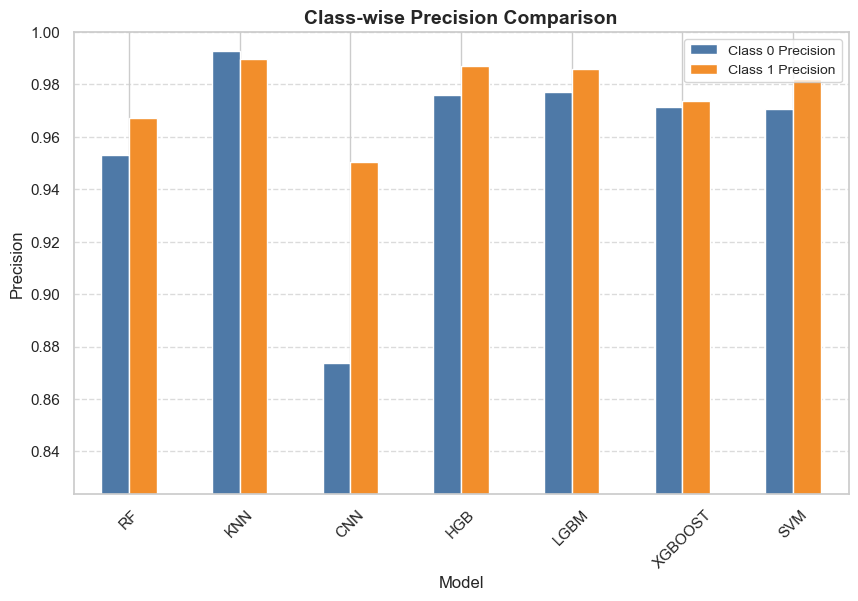

In [26]:
plot_metric(df, ['Class 0 Precision', 'Class 1 Precision'], 
            'Class-wise Precision Comparison', 'Precision', 
            ['#4E79A7', '#F28E2B'])


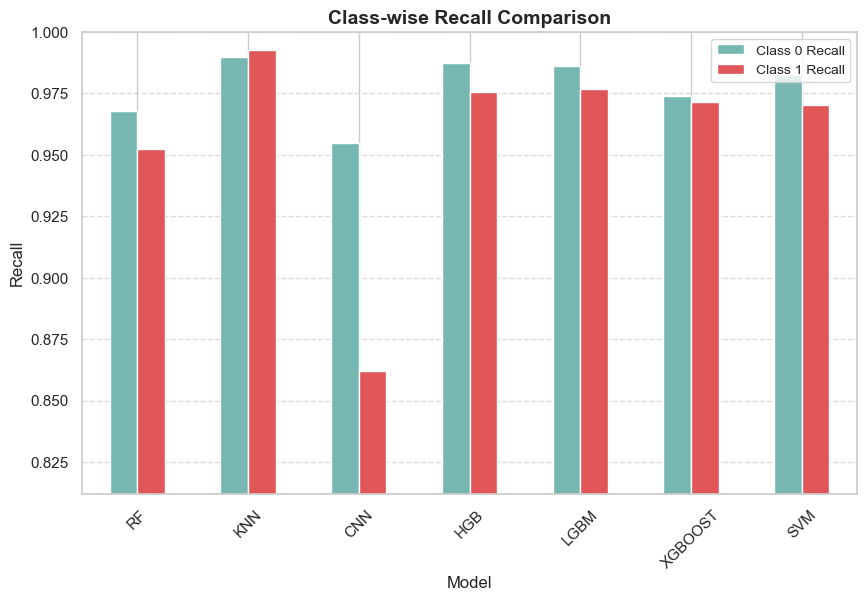

In [27]:
plot_metric(df, ['Class 0 Recall', 'Class 1 Recall'], 
            'Class-wise Recall Comparison', 'Recall', 
            ['#76B7B2', '#E15759'])

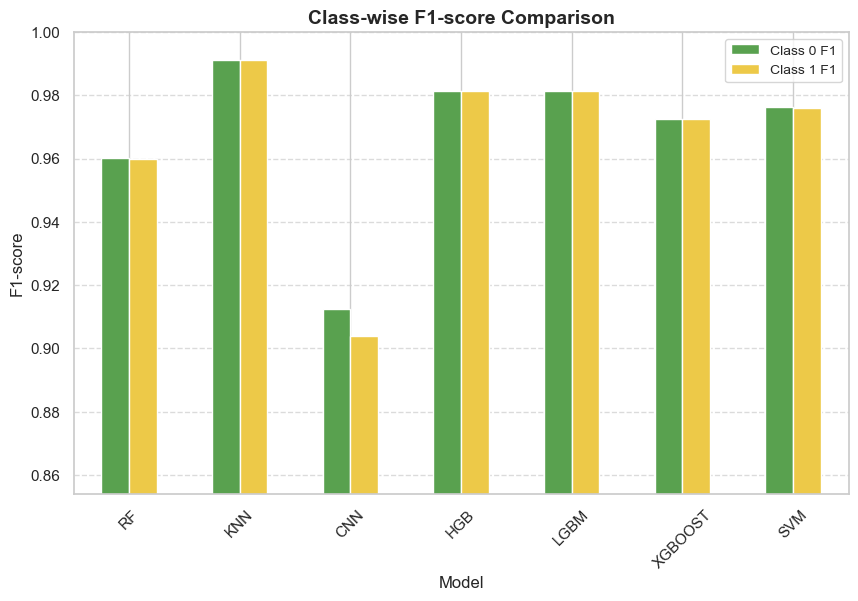

In [28]:
plot_metric(df, ['Class 0 F1', 'Class 1 F1'], 
            'Class-wise F1-score Comparison', 'F1-score', 
            ['#59A14F', '#EDC948'])


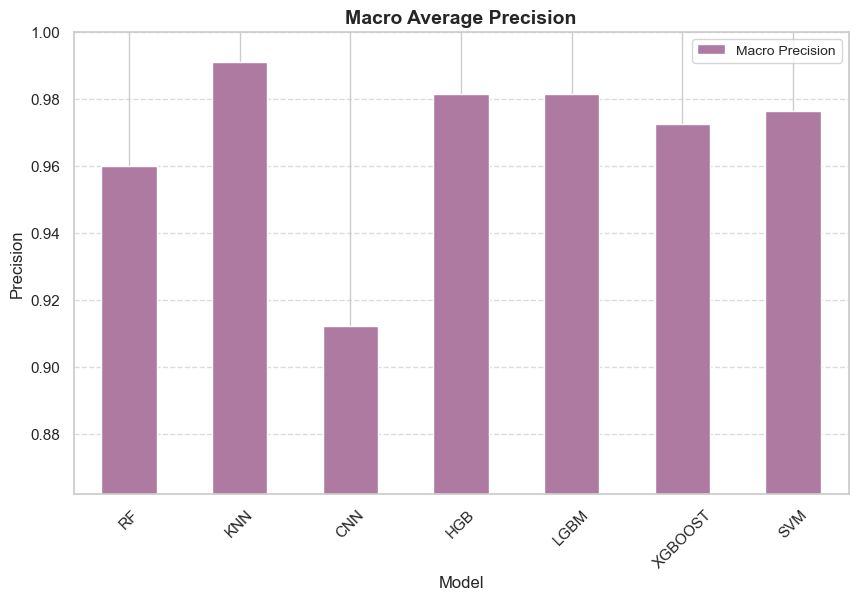

In [29]:
plot_metric(df, ['Macro Precision'], 'Macro Average Precision', 'Precision', ['#AF7AA1'])

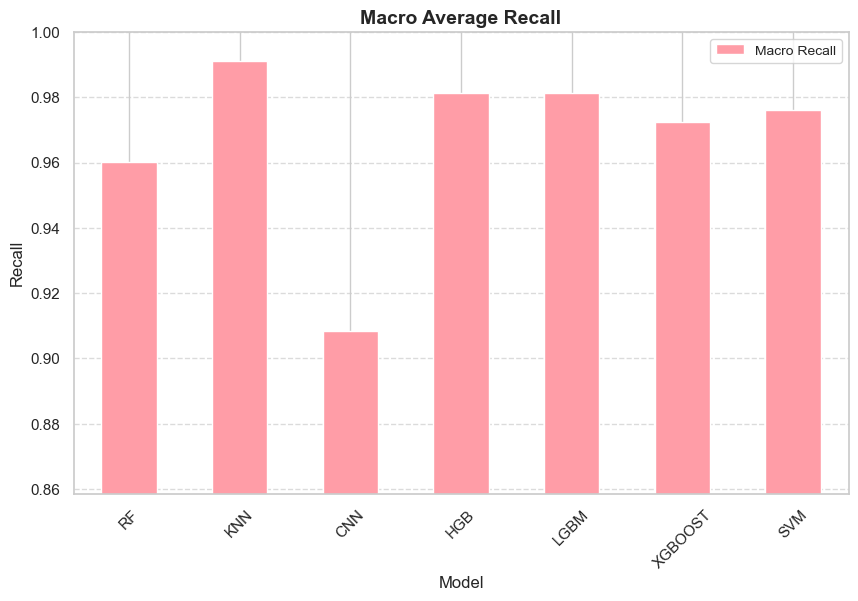

In [30]:
plot_metric(df, ['Macro Recall'], 'Macro Average Recall', 'Recall', ['#FF9DA7'])

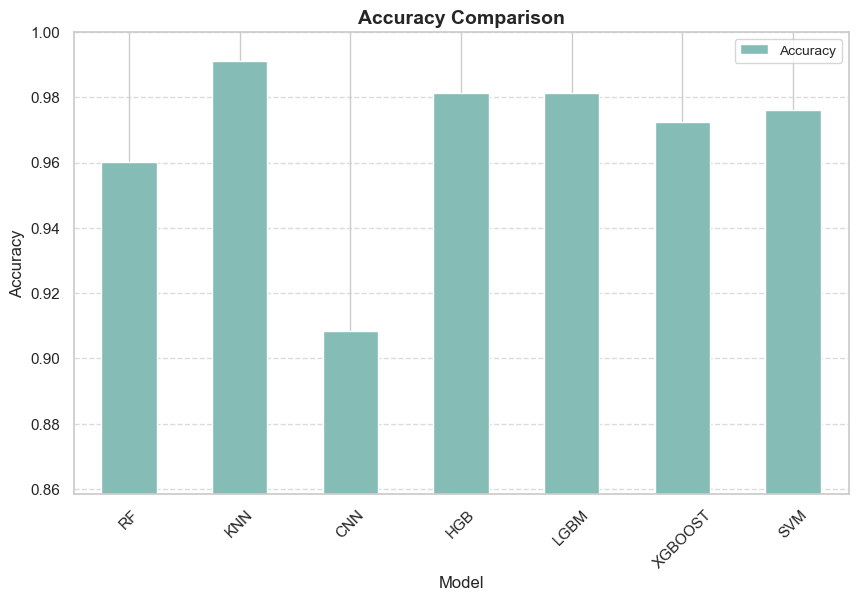

In [31]:
plot_metric(df, ['Accuracy'], 'Accuracy Comparison', 'Accuracy', ['#86BCB6'])